In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

from bs4 import BeautifulSoup
import re

# Importing libraries from nltk.
import nltk # natural language toolkit

nltk.download('punkt')
from nltk.tokenize import sent_tokenize

from nltk.tokenize import word_tokenize

from nltk.tokenize import TreebankWordTokenizer

import string

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import SnowballStemmer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.0 MB/s eta 0:00:00


In [3]:
import contractions

In [4]:
# Establishing a connection to SQLite database stored in the file named database.sqlite .
conn = sqlite3.connect(r'/content/drive/MyDrive/Learn Advanced AI/Datasets/Amazon Fine Foods Dataset/database.sqlite')
conn

In [5]:
all_data = pd.read_sql_query('select * from reviews', conn)

In [6]:
all_data.shape

(568454, 10)

In [7]:
all_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [9]:
#  No duplicate rows data found.
all_data.duplicated().sum()

0

## Exploratory Data Analysis:

In [10]:
user_ids_count = all_data.UserId.value_counts()
user_ids_count

UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A25RYX4NFWDJ2N      1
A1I44EGA0EDJ03      1
A1TZXENU9QMGQE      1
A2RM8BU1FCYQM9      1
A6RFVZFCCPPAB       1
Name: count, Length: 256059, dtype: int64

### Inference: Same user may have given multiple reviews.

In [11]:
user_ids_count[(user_ids_count > 1)].values.sum()

393063

In [12]:
user_id = 'A3OXHLG6DIBRW8'
specific_user_data = all_data[all_data['UserId'] == user_id]
specific_user_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
369,370,B002O3VHXU,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1282176000,Very Smooth Coffee - Highly Recommended,"Green Mountain ""Nantucket Blend"" K-Cups make a..."
813,814,B004ET7MG8,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",3,4,2,1272240000,Odd Fake Flavor - Not Recommended,"Trident ""Strawberry Twist"" sugarless gum is ve..."
3306,3307,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24,25,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...
3416,3417,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,5,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...
3926,3927,B000VSDFRG,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",2,2,5,1237161600,Great Diabetic Friendly Candy - Highly Recomme...,"Hershey ""Sugar Free Caramel Filled Chocolates""..."
...,...,...,...,...,...,...,...,...,...,...
562279,562280,B004HOSGWE,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1329609600,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds a...
563973,563974,B001XSMANI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",3,4,5,1279411200,Great Tasting and a Great Value - Highly Recom...,Kirkland Jelly Beans are a great value and all...
564414,564415,B001D3LUP2,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",2,2,3,1243209600,Good Tasting Sugarfree Gum - Flavor Tapers Off...,"Wrigley's Elixir Gum is good tasting, but onl..."
567686,567687,B005K4Q68Q,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24,25,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...


In [13]:
specific_user_data.ProductId.value_counts()

ProductId
B0018AD7QK    2
B005K4Q4KG    2
B000AYFATW    2
B000AY9UBQ    2
B001J9QBU4    2
             ..
B0000DJDJZ    1
B006GA666U    1
B000GW257S    1
B007ATOR2Q    1
B004OQ257M    1
Name: count, Length: 420, dtype: int64

### Inference: Same user may have given multiple reviews for same and different products.

In [14]:
product_id = 'B005K4Q68Q'
specific_user_data[specific_user_data['ProductId'] == product_id]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
567686,567687,B005K4Q68Q,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24,25,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...
567796,567797,B005K4Q68Q,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,5,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...


In [15]:
all_data.ProductId.value_counts()

ProductId
B007JFMH8M    913
B002QWHJOU    632
B002QWP89S    632
B0026RQTGE    632
B002QWP8H0    632
             ... 
B004CHDG44      1
B004CZUOSM      1
B009GTIHG0      1
B003IFB148      1
B002XO3Q52      1
Name: count, Length: 74258, dtype: int64

In [16]:
all_data.ProfileName.value_counts()

ProfileName
C. F. Hill "CFH"                          451
O. Brown "Ms. O. Khannah-Brown"           421
Gary Peterson                             389
Rebecca of Amazon "The Rebecca Review"    365
Chris                                     363
                                         ... 
Bigforker                                   1
mermadelove "Sparkle on!"                   1
CDC "cdc"                                   1
zachariah                                   1
Steeleye Span                               1
Name: count, Length: 218418, dtype: int64

In [17]:
profile_name = 'C. F. Hill "CFH"'
all_data[all_data.ProfileName == profile_name]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
369,370,B002O3VHXU,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1282176000,Very Smooth Coffee - Highly Recommended,"Green Mountain ""Nantucket Blend"" K-Cups make a..."
813,814,B004ET7MG8,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",3,4,2,1272240000,Odd Fake Flavor - Not Recommended,"Trident ""Strawberry Twist"" sugarless gum is ve..."
3306,3307,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24,25,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...
3416,3417,B005K4Q1VI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",5,5,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...
3926,3927,B000VSDFRG,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",2,2,5,1237161600,Great Diabetic Friendly Candy - Highly Recomme...,"Hershey ""Sugar Free Caramel Filled Chocolates""..."
...,...,...,...,...,...,...,...,...,...,...
562279,562280,B004HOSGWE,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",1,1,5,1329609600,Great Spicy Snack - Highly Recommended,The Blue Diamond Jalapeno Smokehouse Almonds a...
563973,563974,B001XSMANI,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",3,4,5,1279411200,Great Tasting and a Great Value - Highly Recom...,Kirkland Jelly Beans are a great value and all...
564414,564415,B001D3LUP2,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",2,2,3,1243209600,Good Tasting Sugarfree Gum - Flavor Tapers Off...,"Wrigley's Elixir Gum is good tasting, but onl..."
567686,567687,B005K4Q68Q,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",24,25,5,1321401600,Really Good Hot Cocoa - Highly Recommended,These Grove Square Hot Cocoa flavors are by fa...


In [18]:
all_data[all_data.ProfileName == profile_name].UserId.value_counts()

UserId
A3OXHLG6DIBRW8        448
#oc-R3TXZAQ0JD85LR      3
Name: count, dtype: int64

### Inference: Two different users may have same ProfileName.

In [19]:
all_data['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [20]:
all_data['Score'].value_counts(normalize=True)

Score
5    0.638789
4    0.141885
1    0.091948
3    0.075010
2    0.052368
Name: proportion, dtype: float64

### Dropping rows where HelpfulnessNumerator > HelpfulnessDenominator.

In [21]:
inconsistent_rows = all_data[all_data['HelpfulnessNumerator'] > all_data['HelpfulnessDenominator']]
inconsistent_rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [22]:
inconsistent_rows.index.values

array([44736, 64421])

In [23]:
all_data.drop(inconsistent_rows.index.values, inplace=True)

In [24]:
all_data[all_data['HelpfulnessNumerator'] > all_data['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [25]:
all_data.loc[:, ['HelpfulnessNumerator', 'HelpfulnessDenominator']].describe()

,HelpfulnessNumerator,HelpfulnessDenominator
count,568452.000000,568452.000000
mean,1.743813,2.228813
std,7.636526,8.289755
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,2.000000,2.000000
max,866.000000,923.000000


In [26]:
selected_data = all_data.copy().iloc[:50000]
selected_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
49996,49997,B00430B73W,A2PEHNEDMHOYTW,L. Allen,0,0,5,1258934400,Healthy Snack at a great price!,A friend recommended these bars and I fell in ...
49997,49998,B00430B73W,A2QH2KF2IAB143,"J. A. Meyers ""Jan""",0,0,5,1257379200,Raw Revolution Hazelnut Cashew,Fabulous! I take one to work with me every da...
49998,49999,B00430B73W,AMX286UGXISMA,Aaron Dragushan,0,0,4,1247702400,"fantastic, but chew carefully",I love these bars and will continue to buy the...
49999,50000,B00430B73W,A3042WJDYJ22S8,"Sunny Side Up ""CoffeeBuzz""",0,0,5,1178755200,Very Tasty and Healthy.,"These are very good; nutritious, great flavor ..."


### We remove duplicate rows considering 'UserId','ProfileName','Time','Text'.

In [27]:
selected_data.drop_duplicates(subset={'UserId','ProfileName','Time','Text'},
                              keep='first', inplace = True, ignore_index=True)

In [28]:
selected_data.shape

(46268, 10)

## Text Pre-Processing:

In [29]:
random_indexes = np.random.randint(low=0, high=selected_data.shape[0], size=20)
for i in random_indexes:
    print(f'Index: {i}')
    print(selected_data['Text'][i])
    print('-'*30)

Index: 2968
Excellent for GF.  Not bad on it's own but I have used it as a basis for coconut cake, pineapple upside down cake, tres leches cake and others.
------------------------------
Index: 7650
I really do not know what the issue is with this goat milk. My one year old daughter has suffered horrible constipation since switching to cow milk on her birthday. After a month of us both suffering (because I had to help it along if you get my drift), I switched her to goat milk. After 2 days, she was passing perfectly soft stools. The goat milk definitely cured her of the constipation, but each can I open seems to be different. Sometimes when I reconsitute it, I know right away that it is going to taste terrible because the smell is so strong. Other cans, I hardly notice it. She will not drink the bad-smelling milk, and when I have tried it, I have nearly vomitted! Majorly salty and gamey tasting.<br />Compared to fresh (Meyenberg from the fridge section of grocery store), well, it reall

### html.parser vs lxml:

**Performance:** lxml is generally faster than html.parser because it's a C library. If performance
is a significant concern, especially for parsing large or complex HTML documents, lxml might be
a better choice.

**Compatibility**: html.parser is part of Python's standard library, so it doesn't require any
additional installations. It's a pure Python parser, making it more compatible across different
systems. On the other hand, lxml is not part of the standard library, so you need to install it
separately.

**HTML and XML Handling**: lxml is more versatile and can handle both HTML and XML parsing. It
also supports parsing broken HTML better than html.parser. If you're dealing with malformed
or messy HTML, lxml might provide better results.

**Dependencies:** If you're concerned about adding dependencies to your project, html.parser might
be preferable because it doesn't require any external libraries beyond the Python standard library.

**Memory Usage:** html.parser is generally more memory efficient than lxml, which could be a
consideration if memory usage is a concern for your application.

In [30]:
def extract_text(broken_markup_text):
  print('Original broken markup text:')
  print(broken_markup_text)
  print('-'*30)

  proper_markup_text = BeautifulSoup(broken_markup_text, 'lxml')
  print('Proper markup text:')
  print(proper_markup_text)
  print('-'*30)

  print('Extracted text:')
  extracted_text = proper_markup_text.getText()
  print(extracted_text)

In [31]:
extract_text(selected_data.iloc[6810]['Text'])

Original broken markup text:
I was anxious to try this, but upon the first sip it was apparent to me that this drink was not going to go well for me.  It has a very sharp/harsh citrus-y metallic flavor and combined with the overwhelming sweetness, the two seem to battle it out in my mouth for dominance.  After awhile it seemed like the drink was going down more like syrup more than a carbonated beverage.<br /><br />The can is small at 8.3 oz (a regular sized pop can is 12 oz) and the cost of these little guys seem a little bit astronomical.<br /><br />I also am a bit dubious of its attempts to seem like a healthy alternative to pop.  It still has loads of sugar in it.  So when they claim "no additional sugar" this may lead you to believe no sugar or low sugar... but it does in fact have 34 grams.
------------------------------
Proper markup text:
<html><body><p>I was anxious to try this, but upon the first sip it was apparent to me that this drink was not going to go well for me.  It h

In [32]:
for i in range(selected_data.shape[0]):
  if 'http' in selected_data['Text'][i]:
    print(f'Index: {i}')
    print(selected_data['Text'][i])
    print('-'*30)

Index: 21
I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>
------------------------------
Index: 25
Product received is as advertised.<br /><br /><a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>
------------------------------
Index: 38
I ordered this for my wife as it was reccomended by our daughter.  She has this almost every morning and likes all flavors.  She's happy, I'm happy!!!<br /><a href="http://www.amazon.com/gp/product/B001EO5QW8">McCANN'S Instant Irish Oatmeal, Variety Pack of Regular, Apples & Cinnamon, and Maple & Brown Sugar, 10-Count Boxes (Pack of 6)</a>
------------------------------
Index: 347
"These are delicious! The chocolate is excellen

In [33]:
extract_text(selected_data.iloc[21]['Text'])

Original broken markup text:
I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>
------------------------------
Proper markup text:
<html><body><p>I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br/>There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a></p></body></html>
------------------------------
Extracted text:
I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.There are generous amounts of Twizzlers in each 16-ounce bag, and this was well

In [34]:
for i in range(selected_data.shape[0]):
  text = selected_data['Text'][i]
  soup = BeautifulSoup(text, 'lxml')
  if 'http' in soup.getText():
      print(f'i: {i}')
      print(f'Index: {i}')
      print(selected_data['Text'][i])
      print('-'*30)

<ipython-input-34-1a3edf6c6236>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


i: 1006
Index: 1006
I was hoping these were more true caramels, not caramel-flavored truffles, but they're still delicious. Would definitely order them again, and maybe extra for gifts. The salt just makes them extra amazing.<br /><br />Bummer about the shipping-- shipping on this item is reasonable, but we bought the chocolate covered pretzels at the same time, and shipping was charged for both items even though they arrived in the same box. There wasn't even anything fancy about the packaging!<br /><br />edit: okay, these actually bother my stomach a little after one truffle. the package wasn't shipped with an ingredients list, and i had to go to the company site directly and find a well-hidden and hard to follow ingredients page to discover there's a lot of shady ingredients, including high fructose corn syrup. For $40 a box, I expect NO CORN SYRUP. I also don't expect propylene glycol (antifreeze) in vanilla, which I expect to be 100% vanilla beans, and NOT artificial vanillin (whi

### We also have text that contains links not as the value of href attribute of the anchor tag. And we handle it using regex.

In [35]:
# Because of this below text that contains 'shepherd/collie' the BeautifulSoup library finds it
# as a filename and we get the above warning.
extract_text(selected_data.iloc[86]['Text'])

Original broken markup text:
My shepherd/collie mix has IBS.  Our vet recommended a limited ingredient food.  This has really helped her symptoms and she likes it.  I will always buy it from Amazon...it's $10 cheaper and free shipping!
------------------------------
Proper markup text:
<html><body><p>My shepherd/collie mix has IBS.  Our vet recommended a limited ingredient food.  This has really helped her symptoms and she likes it.  I will always buy it from Amazon...it's $10 cheaper and free shipping!</p></body></html>
------------------------------
Extracted text:
My shepherd/collie mix has IBS.  Our vet recommended a limited ingredient food.  This has really helped her symptoms and she likes it.  I will always buy it from Amazon...it's $10 cheaper and free shipping!


<ipython-input-30-aab9f013d963>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  proper_markup_text = BeautifulSoup(broken_markup_text, 'lxml')


In [36]:
extract_text(selected_data.iloc[1046]['Text'])

Original broken markup text:
This is a cute product to use in place of sprinkles - the bright colors of candy coating look great, and the chocolate center keeps them from being overly sweet.<br /><br />However this price is roughly double what you pay at Michael's (or Marshall's, when they stock stuff like this). Plus you can get the same product but in a 16 oz bag on Amazon here: http://www.amazon.com/CK-Products-Rainbow-Candy-Coated/dp/B00375LAO0/ref=sr_1_1?ie=UTF8&s=home-garden&qid=1300131716&sr=1-1. Comes with Prime shipping too!
------------------------------
Proper markup text:
<html><body><p>This is a cute product to use in place of sprinkles - the bright colors of candy coating look great, and the chocolate center keeps them from being overly sweet.<br/><br/>However this price is roughly double what you pay at Michael's (or Marshall's, when they stock stuff like this). Plus you can get the same product but in a 16 oz bag on Amazon here: http://www.amazon.com/CK-Products-Rainbow

In [37]:
soup = BeautifulSoup(selected_data.iloc[1046]['Text'])
soup

<html><body><p>This is a cute product to use in place of sprinkles - the bright colors of candy coating look great, and the chocolate center keeps them from being overly sweet.<br/><br/>However this price is roughly double what you pay at Michael's (or Marshall's, when they stock stuff like this). Plus you can get the same product but in a 16 oz bag on Amazon here: http://www.amazon.com/CK-Products-Rainbow-Candy-Coated/dp/B00375LAO0/ref=sr_1_1?ie=UTF8&amp;s=home-garden&amp;qid=1300131716&amp;sr=1-1. Comes with Prime shipping too!</p></body></html>

In [38]:
re.sub(r'(http|https)://[\S]+', '', soup.getText())

"This is a cute product to use in place of sprinkles - the bright colors of candy coating look great, and the chocolate center keeps them from being overly sweet.However this price is roughly double what you pay at Michael's (or Marshall's, when they stock stuff like this). Plus you can get the same product but in a 16 oz bag on Amazon here:  Comes with Prime shipping too!"

### Dealing with English language contractions:

In [39]:
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

# https://medium.com/@lukei_3514/dealing-with-contractions-in-nlp-d6174300876b


# Example text with contractions
sample_sentences = ["They'll be there soon. He's going to the store.",
                    'I am gonna complete this by today.', "I'd dinner.", "I'd like coffee",
                    "I ain't sick.", "I didn't go to school yesterday.",
                    "I don't want to listen any excuses.", "John's dog is a husky.",
                    "John's is a web developer."]

In [40]:
for sentence in sample_sentences:
  # Expand contractions
  expanded_text = contractions.fix(sentence)

  print(expanded_text)

They will be there soon. He is going to the store.
I am going to complete this by today.
I would dinner.
I would like coffee
I are not sick.
I did not go to school yesterday.
I do not want to listen any excuses.
John's dog is a husky.
John's is a web developer.


### The contractions.fix() does not work for some cases like ain't and I'd because there is an ambiguity in finding the correct expansion for this contraction. But for sake of its simplicity we can tolerate these edge cases.

In [41]:
selected_data['Text']

0        I have bought several of the Vitality canned d...
1        Product arrived labeled as Jumbo Salted Peanut...
2        This is a confection that has been around a fe...
3        If you are looking for the secret ingredient i...
4        Great taffy at a great price.  There was a wid...
                               ...                        
46263    A friend recommended these bars and I fell in ...
46264    Fabulous!  I take one to work with me every da...
46265    I love these bars and will continue to buy the...
46266    These are very good; nutritious, great flavor ...
46267    Only one bad thing - the are a little large so...
Name: Text, Length: 46268, dtype: object

In [42]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def preprocess_documents(documents, tokenize, normalize, additional_stopwords=[], print_logs=True):

  normalized_documents = []

  for document in documents:
    # Convert the documents into tokens.

    soup5 = BeautifulSoup(document, 'lxml')
    text_no_html_tags = soup5.getText()
    text_no_links = re.sub(r'(http|https)://[\S]+', '', text_no_html_tags)


    text_no_contractions = contractions.fix(text_no_links)

    tokens = tokenize(text_no_contractions)
    tokens_no_punct = []

    for token in tokens:
      if token not in string.punctuation:
          # To handle cases where . that separates two words like in 'sweet.however'.
          if (re.search(r'[a-zA-Z]{2,}\.[a-zA-Z]{2,}', token)):
              tokens_no_punct.extend(token.lower().split('.'))
          else:
              tokens_no_punct.append(token.lower())

    english_stopwords = set(stopwords.words('english'))

    # Words to exclude
    exclude_words = {'not', 'no'}

    # Remove the exclude_words from the stopwords list
    filtered_stopwords = english_stopwords - exclude_words

    final_stopwords = filtered_stopwords.union(additional_stopwords)

    tokens_no_stop_words = [token for token in tokens_no_punct
                            if token not in final_stopwords]

    tokens_normalized = [normalize(token) for token in tokens_no_stop_words]


    if print_logs:
      print(f'\nPrinting tokens')
      print(tokens)

      print(f'\nTokens after removing punctuations and converting it into lower case')
      print(tokens_no_punct)

      print(f'\nTokens after removing stopwords')
      print(tokens_no_stop_words)

      print(f'\nTokens after normalization')
      print(tokens_normalized)

      print(f'\n{"-"*30}')

    normalized_documents.append(' '.join(tokens_normalized))

  return normalized_documents

In [44]:
# TreebankWordTokenizer().tokenize():
# https://www.nltk.org/api/nltk.tokenize.TreebankWordTokenizer.html
treebankTokenizer = TreebankWordTokenizer()

snowball_stemmer = SnowballStemmer('english')

lemmatizer = WordNetLemmatizer()

In [45]:
normalized_documents_1 = preprocess_documents(sample_sentences,
                                              word_tokenize,
                                              snowball_stemmer.stem,
                                              additional_stopwords=['...', "'s"])


Printing tokens
['They', 'will', 'be', 'there', 'soon', '.', 'He', 'is', 'going', 'to', 'the', 'store', '.']

Tokens after removing punctuations and converting it into lower case
['they', 'will', 'be', 'there', 'soon', 'he', 'is', 'going', 'to', 'the', 'store']

Tokens after removing stopwords
['soon', 'going', 'store']

Tokens after normalization
['soon', 'go', 'store']

------------------------------

Printing tokens
['I', 'am', 'going', 'to', 'complete', 'this', 'by', 'today', '.']

Tokens after removing punctuations and converting it into lower case
['i', 'am', 'going', 'to', 'complete', 'this', 'by', 'today']

Tokens after removing stopwords
['going', 'complete', 'today']

Tokens after normalization
['go', 'complet', 'today']

------------------------------

Printing tokens
['I', 'would', 'dinner', '.']

Tokens after removing punctuations and converting it into lower case
['i', 'would', 'dinner']

Tokens after removing stopwords
['would', 'dinner']

Tokens after normalization
['w

In [46]:
normalized_documents_2 = preprocess_documents(selected_data['Text'].values[86:87],
                                              treebankTokenizer.tokenize, lemmatizer.lemmatize,
                                              additional_stopwords=['...', "'s"])
normalized_documents_2

<ipython-input-43-d588d91c7c04>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup5 = BeautifulSoup(document, 'lxml')



Printing tokens
['My', 'shepherd/collie', 'mix', 'has', 'IBS.', 'Our', 'vet', 'recommended', 'a', 'limited', 'ingredient', 'food.', 'This', 'has', 'really', 'helped', 'her', 'symptoms', 'and', 'she', 'likes', 'it.', 'I', 'will', 'always', 'buy', 'it', 'from', 'Amazon', '...', 'it', 'is', '$', '10', 'cheaper', 'and', 'free', 'shipping', '!']

Tokens after removing punctuations and converting it into lower case
['my', 'shepherd/collie', 'mix', 'has', 'ibs.', 'our', 'vet', 'recommended', 'a', 'limited', 'ingredient', 'food.', 'this', 'has', 'really', 'helped', 'her', 'symptoms', 'and', 'she', 'likes', 'it.', 'i', 'will', 'always', 'buy', 'it', 'from', 'amazon', '...', 'it', 'is', '10', 'cheaper', 'and', 'free', 'shipping']

Tokens after removing stopwords
['shepherd/collie', 'mix', 'ibs.', 'vet', 'recommended', 'limited', 'ingredient', 'food.', 'really', 'helped', 'symptoms', 'likes', 'it.', 'always', 'buy', 'amazon', '10', 'cheaper', 'free', 'shipping']

Tokens after normalization
['she

['shepherd/collie mix ibs. vet recommended limited ingredient food. really helped symptom like it. always buy amazon 10 cheaper free shipping']

In [47]:
selected_data['Text'].values[86:87]

array(["My shepherd/collie mix has IBS.  Our vet recommended a limited ingredient food.  This has really helped her symptoms and she likes it.  I will always buy it from Amazon...it's $10 cheaper and free shipping!"],
      dtype=object)

In [48]:
normalized_documents_3 = preprocess_documents(selected_data['Text'].values[1046:1047],
                                              treebankTokenizer.tokenize,
                                              lemmatizer.lemmatize, additional_stopwords=['...', "'s"])
normalized_documents_3


Printing tokens
['This', 'is', 'a', 'cute', 'product', 'to', 'use', 'in', 'place', 'of', 'sprinkles', '-', 'the', 'bright', 'colors', 'of', 'candy', 'coating', 'look', 'great', ',', 'and', 'the', 'chocolate', 'center', 'keeps', 'them', 'from', 'being', 'overly', 'sweet.However', 'this', 'price', 'is', 'roughly', 'double', 'what', 'you', 'pay', 'at', 'Michael', "'s", '(', 'or', 'Marshall', "'s", ',', 'when', 'they', 'stock', 'stuff', 'like', 'this', ')', '.', 'Plus', 'you', 'can', 'get', 'the', 'same', 'product', 'but', 'in', 'a', '16', 'oz', 'bag', 'on', 'Amazon', 'here', ':', 'Comes', 'with', 'Prime', 'shipping', 'too', '!']

Tokens after removing punctuations and converting it into lower case
['this', 'is', 'a', 'cute', 'product', 'to', 'use', 'in', 'place', 'of', 'sprinkles', 'the', 'bright', 'colors', 'of', 'candy', 'coating', 'look', 'great', 'and', 'the', 'chocolate', 'center', 'keeps', 'them', 'from', 'being', 'overly', 'sweet', 'however', 'this', 'price', 'is', 'roughly', 'dou

['cute product use place sprinkle bright color candy coating look great chocolate center keep overly sweet however price roughly double pay michael marshall stock stuff like plus get product 16 oz bag amazon come prime shipping']

In [49]:
selected_data['Text'].values[1046:1047]

array(["This is a cute product to use in place of sprinkles - the bright colors of candy coating look great, and the chocolate center keeps them from being overly sweet.<br /><br />However this price is roughly double what you pay at Michael's (or Marshall's, when they stock stuff like this). Plus you can get the same product but in a 16 oz bag on Amazon here: http://www.amazon.com/CK-Products-Rainbow-Candy-Coated/dp/B00375LAO0/ref=sr_1_1?ie=UTF8&s=home-garden&qid=1300131716&sr=1-1. Comes with Prime shipping too!"],
      dtype=object)

### We decide to use word_tokenize() to tokenize document because it splits text after each punctuation marks and handles special cases as well like it does not split when (.) appears inbetween a token like in 'Mr.John' or '12.23'. In case of Treebank tokenizer for (.) split occur only when periods appear at the end of line like in the sentence 'The cat sleeps on the mat. The mat is soft and comfortable. ' for the last (.) a split would occur.

In [50]:
normalized_documents_4 = preprocess_documents(selected_data['Text'].values,
                                              word_tokenize, lemmatizer.lemmatize,
                                              additional_stopwords=['...', "'s"], print_logs=False)

<ipython-input-43-d588d91c7c04>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup5 = BeautifulSoup(document, 'lxml')


In [51]:
normalized_documents_4[1046]

'cute product use place sprinkle bright color candy coating look great chocolate center keep overly sweet however price roughly double pay michael marshall stock stuff like plus get product 16 oz bag amazon come prime shipping'

In [52]:
normalized_documents_4[0]

'bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better'

In [53]:
len(normalized_documents_4)

46268

In [54]:
cv1 = CountVectorizer(binary=True, ngram_range=(1, 2))
cv1

CountVectorizer(binary=True, ngram_range=(1, 2))

In [55]:
sample_document = ['hi there how are you', 'how was your day']
cv1.fit(sample_document)

CountVectorizer(binary=True, ngram_range=(1, 2))

In [56]:
cv1.vocabulary_

{'hi': 3,
 'there': 8,
 'how': 5,
 'are': 0,
 'you': 12,
 'hi there': 4,
 'there how': 9,
 'how are': 6,
 'are you': 1,
 'was': 10,
 'your': 13,
 'day': 2,
 'how was': 7,
 'was your': 11,
 'your day': 14}

In [57]:
bow1 = cv1.fit_transform(sample_document)
bow1

<2x15 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [58]:
bow1_a = bow1.toarray()
bow1_a

array([[1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1]])

In [59]:
cv2 = CountVectorizer(binary=True, ngram_range=(1, 2))
cv2

CountVectorizer(binary=True, ngram_range=(1, 2))

In [60]:
cv2.fit(normalized_documents_4)

CountVectorizer(binary=True, ngram_range=(1, 2))

In [61]:
len(cv2.vocabulary_)

835178

In [62]:
cv3 = CountVectorizer(binary=True, max_features=5000, ngram_range=(1, 2))
cv3

CountVectorizer(binary=True, max_features=5000, ngram_range=(1, 2))

In [63]:
cv3.fit(normalized_documents_4)

CountVectorizer(binary=True, max_features=5000, ngram_range=(1, 2))

In [64]:
bow3 = cv3.transform(normalized_documents_4)
bow3

<46268x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 1642093 stored elements in Compressed Sparse Row format>

In [65]:
bow3_a = bow3.toarray()
bow3_a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
bow3_a.shape

(46268, 5000)

In [67]:
normalized_documents_4[:3]

['bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better',
 "product arrived labeled jumbo salted peanut peanut actually small sized unsalted not sure error vendor intended represent product `` jumbo ''",
 "confection around century light pillowy citrus gelatin nut case filbert cut tiny square liberally coated powdered sugar tiny mouthful heaven not chewy flavorful highly recommend yummy treat familiar story c.s lewis `` lion witch wardrobe '' treat seduces edmund selling brother sister witch"]

In [68]:
selected_data['Text'].values[:3]

array(['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
       'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".',
       'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'],
   

In [69]:
tfidf_1 = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_1

TfidfTransformer()

In [70]:
tfidf_1.fit(bow3)

TfidfTransformer()

In [71]:
tfidf_1_matrix = tfidf_1.transform(bow3)
tfidf_1_matrix

<46268x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1642093 stored elements in Compressed Sparse Row format>

In [72]:
tfidf_1_a = tfidf_1_matrix.toarray()
tfidf_1_a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
tfidf_1_a.shape

(46268, 5000)

### We can see how sparse the tf-idf matrix is.

In [74]:
tfidf_1_a[0, 425:680]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [75]:
X = pd.DataFrame(tfidf_1_a)

In [76]:
X.shape

(46268, 5000)

In [77]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.188311,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.307118,0.0,0.0,0.0,0.0,0.0


In [78]:
y = selected_data['Score']

In [79]:
y.shape

(46268,)

In [80]:
y.head()

0    5
1    1
2    4
3    2
4    5
Name: Score, dtype: int64

In [81]:
y = pd.Series(np.where(y<=2,0, np.where(y==3, 1, 2)), name=y.name)

In [82]:
y.head()

0    2
1    0
2    2
3    0
4    2
Name: Score, dtype: int64

In [83]:
y.value_counts(normalize=True)

Score
2    0.767701
0    0.151055
1    0.081244
Name: proportion, dtype: float64

## Split the dataset into train and test:

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Building the classifier:

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini',
                                       bootstrap=True, oob_score=True)

In [88]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [89]:
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [91]:
# https://stackoverflow.com/questions/54506626/how-to-understand-seaborns-heatmap-annotation-format
def draw_confusion_matrix(y_true, y_pred, c_matrix_for):
  # labels = ['Not Exited', 'Exited']
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='.0f', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix for {c_matrix_for}')
  plt.show()


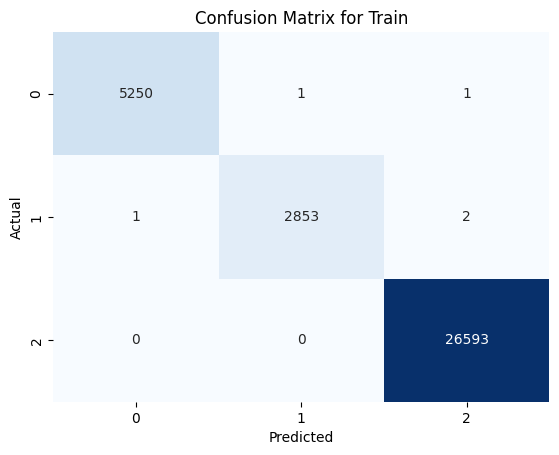

In [92]:
draw_confusion_matrix(y_train, y_pred_train_rf, c_matrix_for='Train')

In [93]:
print('For Train data:')
print(classification_report(y_train, y_pred_train_rf))

print('For Test data:')
print(classification_report(y_test, y_pred_test_rf))

For Train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5252
           1       1.00      1.00      1.00      2856
           2       1.00      1.00      1.00     26593

    accuracy                           1.00     34701
   macro avg       1.00      1.00      1.00     34701
weighted avg       1.00      1.00      1.00     34701

For Test data:
              precision    recall  f1-score   support

           0       0.82      0.33      0.47      1737
           1       0.43      0.01      0.02       903
           2       0.82      0.99      0.90      8927

    accuracy                           0.82     11567
   macro avg       0.69      0.45      0.46     11567
weighted avg       0.79      0.82      0.77     11567



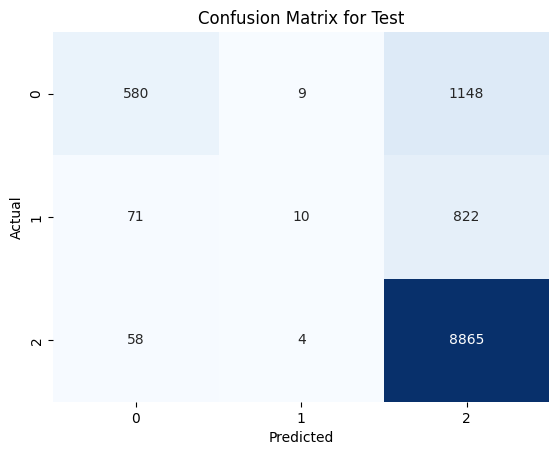

In [94]:
draw_confusion_matrix(y_test, y_pred_test_rf, c_matrix_for='Test')

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gradient_boost = GradientBoostingClassifier(n_estimators=50, random_state=42)

In [98]:
# Took nearly 22 minutes to fit this model using Tesla T4 GPU.
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [99]:
y_pred_train_gb = gradient_boost.predict(X_train)
y_pred_test_gb = gradient_boost.predict(X_test)

In [101]:
print('For Train data:')
print(classification_report(y_train, y_pred_train_gb))

print('For Test data:')
print(classification_report(y_test, y_pred_test_gb))

For Train data:
              precision    recall  f1-score   support

           0       0.88      0.23      0.36      5252
           1       0.79      0.07      0.14      2856
           2       0.80      1.00      0.89     26593

    accuracy                           0.80     34701
   macro avg       0.82      0.43      0.46     34701
weighted avg       0.81      0.80      0.75     34701

For Test data:
              precision    recall  f1-score   support

           0       0.85      0.19      0.31      1737
           1       0.41      0.03      0.06       903
           2       0.80      1.00      0.89      8927

    accuracy                           0.80     11567
   macro avg       0.69      0.41      0.42     11567
weighted avg       0.78      0.80      0.74     11567



## Conclusion:

With Random Forest:
1. We have an overfitting problem.
2. The model does well in classifying the training samples that actually belong to class 2(positive reviews). For class 1(neutral reviews) and class 0(negative reviews) the prediction is not good. This is because we have a highly imbalanced dataset.

With Gradient Boost:
1. We do not have any overfitting problem.
2. Again the model does well in classifying the training samples that actually belong to class 2(positive reviews). For class 1(neutral reviews) and class 0(negative reviews) the prediction is not good. This is because we have a highly imbalanced dataset.